In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers

## 1. The XOR data


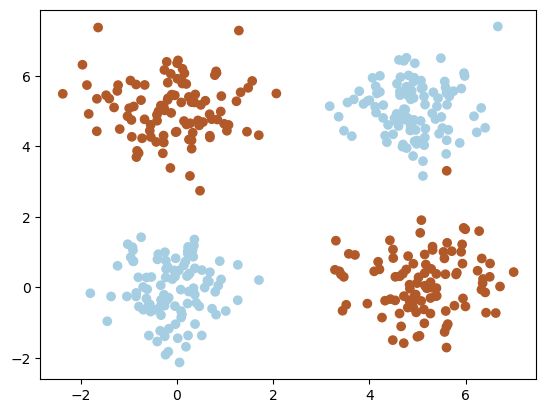

In [2]:
# We create four blobs with different centers to create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem 
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

## 2. Creating the mapping function

In [3]:
#Mapping function with two inputs (binary), a dense layer with two neurons  and one dense output for the XOR result.
xor_problem = tf.keras.Sequential([
    layers.Dense(4, activation='sigmoid', input_dim=2, name="dense1"),
    layers.Dense(1, activation='sigmoid', name="output")
])  


In [4]:
xor_problem.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 4)                 12        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## 3. Plotting the model

In [5]:
#plot model for xor_problem
tf.keras.utils.plot_model(xor_problem, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## 4. Compiling the model

In [6]:
#compile xor_problem with adam optimizer and binary crossentropy loss
xor_problem.compile(optimizer='adam', loss='mean_squared_error', metrics=['binary_accuracy'])

## 5. Training the model

In [7]:
#train  xor_problem model nand display the progress alongside the loss and accuracy
history = xor_problem.fit(X, y, epochs=400, verbose=1)

Epoch 1/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2580 - binary_accuracy: 0.4425
Epoch 2/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2543 - binary_accuracy: 0.5000
Epoch 3/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2508 - binary_accuracy: 0.5450
Epoch 4/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2478 - binary_accuracy: 0.5850
Epoch 5/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2453 - binary_accuracy: 0.5950
Epoch 6/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2429 - binary_accuracy: 0.6125
Epoch 7/400
13/13 [==============================] - 0s 1000us/step - loss: 0.2408 - binary_accuracy: 0.6300
Epoch 8/400
13/13 [==============================] - 0s 997us/step - loss: 0.2389 - binary_accuracy: 0.6450
Epoch 9/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2371 - binary_accuracy: 0.6525
Epoch 10/400
13/13 [=====================

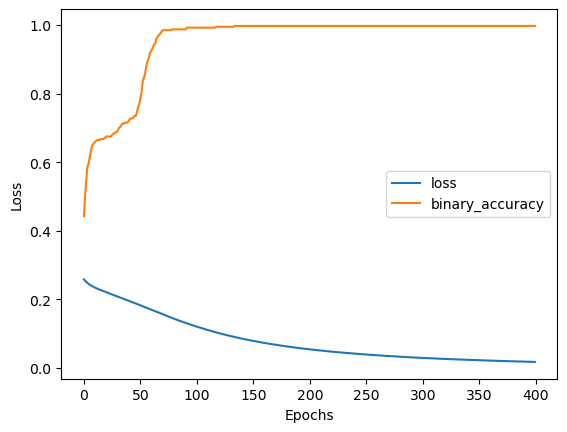

In [8]:
#Plot the loss and vaccuracy alongside the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.legend(['loss', 'binary_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 6. Displaying the boundaries in XOR

33622/33622 [==============================] - 23s 692us/step


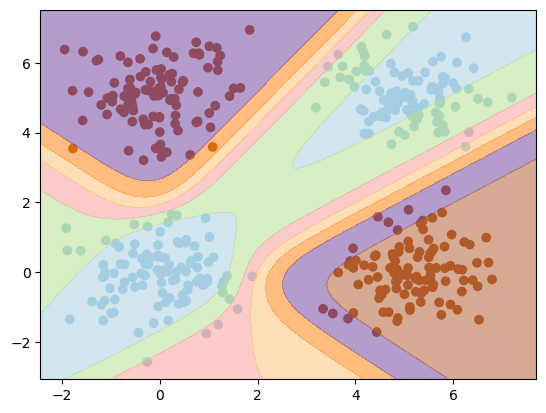

In [12]:
#original problem
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem 
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)


365/365 [==============================] - 0s 631us/step


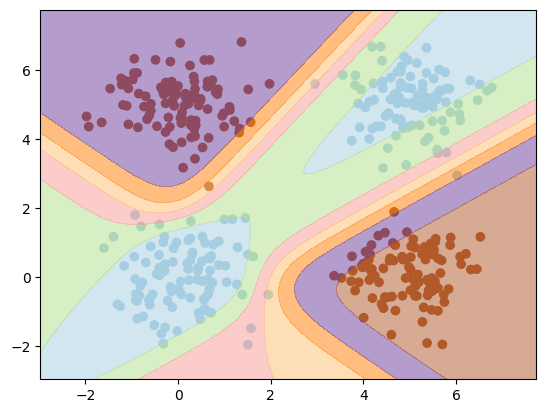

In [10]:
#plot the boundaries for this plot using the xor_problem model
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = xor_problem.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.show()
